___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Indest Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_org = pd.read_csv('/content/drive/MyDrive/data/Frozen_Dessert_Production.csv', index_col='DATE', parse_dates = True)

In [6]:
df = df_org.copy()
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [9]:
df.columns = ["Production"]

In [10]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


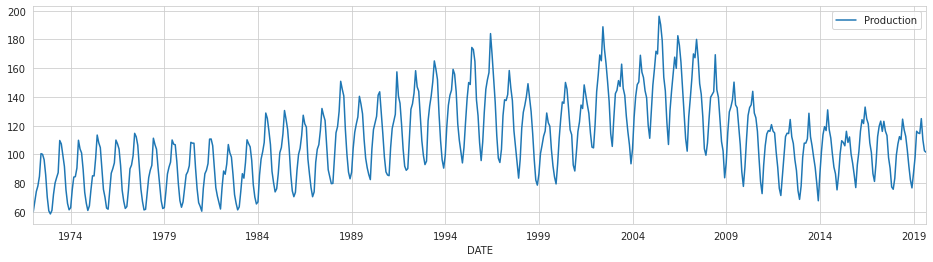

In [11]:
df.plot(figsize=(16,4));

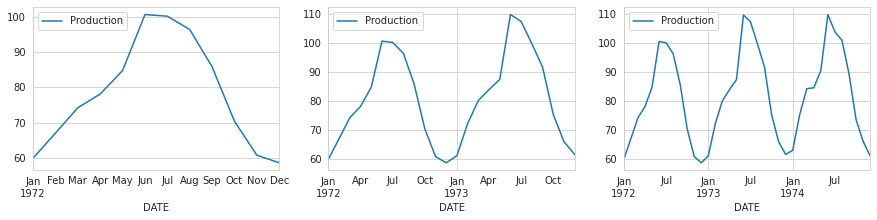

In [12]:
fig,axes = plt.subplots(1,3,figsize=(15,3))
ax = axes.flatten()
df.iloc[:12].plot(ax=ax[0])
df.iloc[:24].plot(ax=ax[1])
df.iloc[:36].plot(ax=ax[2])
plt.show()

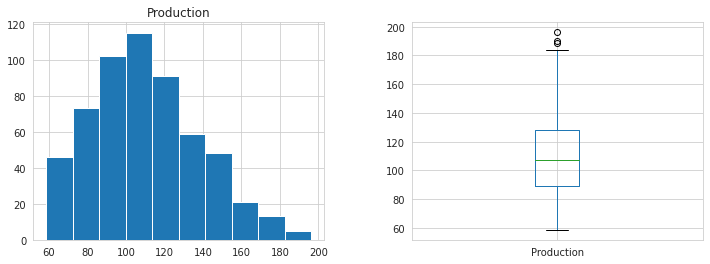

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax=axes.flatten()
df.hist(ax = ax[0])
df.boxplot(ax = ax[1]);

# Preprocessing of Data

## Train Test Split

In [14]:
len(df)*0.15

85.95

In [15]:
train = df.iloc[:-85]
test = df.iloc[-85:]

In [16]:
train.shape, test.shape

((488, 1), (85, 1))

## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [22]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

# Modelling & Model Performance

## with "tanh" activation function

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [43]:
n_features = 1

In [44]:
model = Sequential()

model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features))) 

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x = generator, epochs = 12)

Epoch 1/12
476/476 [==============================] - 3s 4ms/step - loss: 0.0101
Epoch 2/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0042
Epoch 3/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0042
Epoch 4/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0039
Epoch 5/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0041
Epoch 6/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0046
Epoch 7/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0041
Epoch 8/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0047
Epoch 9/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0046
Epoch 10/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 11/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0044
Epoch 12/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0036


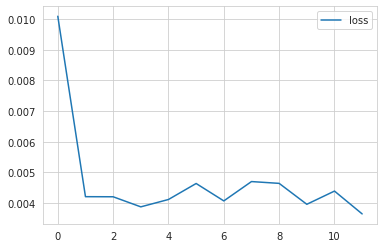

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [48]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

### Inverse Transformation and Comparing

In [49]:
predictions = scaler.inverse_transform(predictions_scaled)

In [50]:
test['RNN_Predictions_tanh'] = predictions

In [51]:
predictions

array([[ 97.79909049],
       [ 92.83347807],
       [ 92.83692878],
       [ 96.74117658],
       [106.60149788],
       [116.56199231],
       [125.44565128],
       [128.87350811],
       [127.10035817],
       [122.07455909],
       [114.32706981],
       [108.03123634],
       [104.52789005],
       [105.65005198],
       [111.03979879],
       [119.03179688],
       [127.57155668],
       [133.98154644],
       [136.80095082],
       [135.37678187],
       [130.68005045],
       [124.72810386],
       [119.74580343],
       [117.69336297],
       [119.33130808],
       [124.3284974 ],
       [131.2599669 ],
       [138.16003983],
       [143.18408897],
       [145.12143053],
       [143.82239704],
       [140.13947026],
       [135.67199403],
       [132.18848729],
       [131.02736755],
       [132.71647092],
       [136.84850673],
       [142.28981342],
       [147.55907626],
       [151.30866491],
       [152.73374368],
       [151.78935493],
       [149.17347702],
       [146

## with "relu" activation function

In [52]:
model2 = Sequential()

model2.add(SimpleRNN(units = 100, activation = "relu", input_shape=(length, n_features))) 

model2.add(Dense(units = 1))

model2.compile(optimizer='adam', loss='mse')

In [53]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.fit(x = generator, epochs = 12)

Epoch 1/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0019
Epoch 2/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 3/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 4/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 5/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 6/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 7/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 8/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 9/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 10/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 11/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 12/12
476/476 [==============================] - 2s 4ms/step - loss: 0.0015


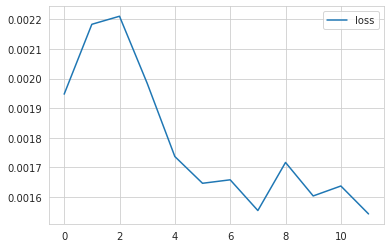

In [57]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot();

### Evaluation on Test Data

In [58]:
predictions_scaled2 = []

first_eval_batch2 = train_scaled[-length:]
current_batch2 = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred2 = model2.predict(current_batch2)
    
    # store prediction
    predictions_scaled2.append(current_pred2[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch2 = np.append(current_batch2[:, 1:, :], [current_pred2], axis = 1)

### Inverse Transformation and Comparing

In [59]:
predictions2 = scaler.inverse_transform(predictions_scaled2)

In [60]:
test['RNN_Predictions_relu'] = predictions2

In [61]:
test

,Production,RNN_Predictions_tanh,RNN_Predictions_relu
DATE,,,
2012-09-01,96.370,97.799,94.452
2012-10-01,88.886,92.833,83.354
2012-11-01,74.838,92.837,77.561
2012-12-01,68.769,96.741,77.138
2013-01-01,78.118,106.601,80.104
...,...,...,...
2019-05-01,114.561,163.922,114.813
2019-06-01,124.960,164.796,128.067
2019-07-01,110.263,165.729,142.345


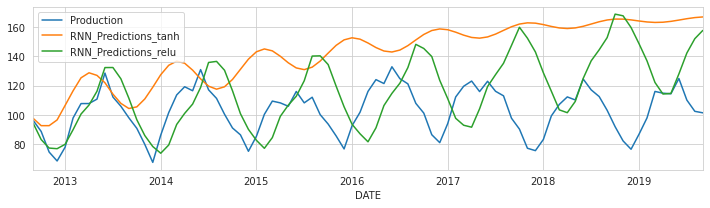

In [63]:
test.plot(figsize=(12,3));

## Modeling with LSTM

In [64]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [67]:
length = 12 
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

In [70]:
model.fit(x = generator,
          validation_data = validation_generator,
          epochs = 20,
          callbacks = [early_stop])

Epoch 1/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 2/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 3/20
476/476 [==============================] - 4s 9ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 4/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 5/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 6/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 7/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 8/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 9/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 10/20
476/476 [==============================] - 4s 8ms/step - loss: 0.0031 - val_loss: 0.0021

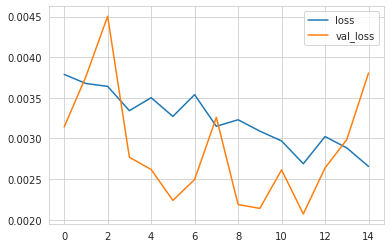

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
predictions_scaled3 = []

first_eval_batch3 = train_scaled[-length:]
current_batch3 = first_eval_batch3.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred3 = model.predict(current_batch3)
    
    # store prediction
    predictions_scaled3.append(current_pred3[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch3 = np.append(current_batch3[:, 1:, :], [current_pred3], axis = 1)

In [73]:
predictions3 = scaler.inverse_transform(predictions_scaled3)
test['LSTM Predictions'] = predictions3
test

,Production,RNN_Predictions_tanh,RNN_Predictions_relu,LSTM Predictions
DATE,,,,
2012-09-01,96.370,97.799,94.452,95.934
2012-10-01,88.886,92.833,83.354,83.561
2012-11-01,74.838,92.837,77.561,77.095
2012-12-01,68.769,96.741,77.138,80.699
2013-01-01,78.118,106.601,80.104,91.368
...,...,...,...,...
2019-05-01,114.561,163.922,114.813,152.997
2019-06-01,124.960,164.796,128.067,159.970
2019-07-01,110.263,165.729,142.345,162.806


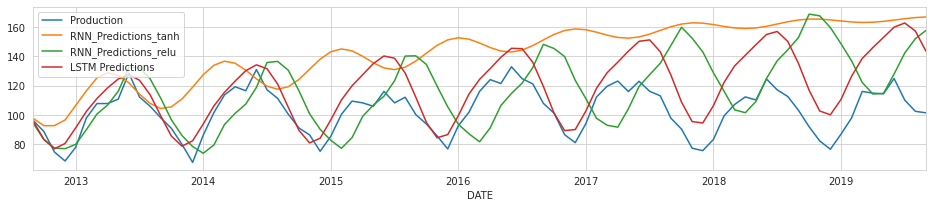

In [75]:
test.plot(figsize=(16,3))

**Best model is LSTM**

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [76]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [77]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [79]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x = generator, epochs = 12)

Epoch 1/12
561/561 [==============================] - 6s 7ms/step - loss: 0.0187
Epoch 2/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0043
Epoch 3/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0040
Epoch 4/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0035
Epoch 5/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0033
Epoch 6/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0033
Epoch 7/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0030
Epoch 8/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0032
Epoch 9/12
561/561 [==============================] - 4s 7ms/step - loss: 0.0029
Epoch 10/12
561/561 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 11/12
561/561 [==============================] - 5s 9ms/step - loss: 0.0028
Epoch 12/12
561/561 [==============================] - 4s 8ms/step - loss: 0.0028


In [80]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [81]:
forecast = scaler.inverse_transform(forecast)

In [82]:
forecast

array([[ 89.38977747],
       [ 83.34975574],
       [ 84.03005432],
       [ 90.42301593],
       [ 98.56160374],
       [105.71372213],
       [110.62405348],
       [113.37577554],
       [113.46864971],
       [109.63992416],
       [103.14561324],
       [ 95.07278159]])

In [83]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


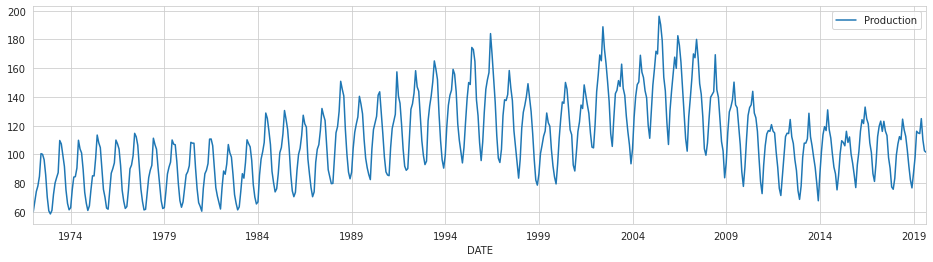

In [87]:
df.plot(figsize=(16,4));

In [96]:
forecast_index = ["2019-10-01","2019-11-01","2019-12-01","2020-01-01","2020-02-01",
                  "2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01"]
forecast_df = pd.DataFrame(forecast, index=forecast_index)

In [103]:
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df.columns = ["Production"]

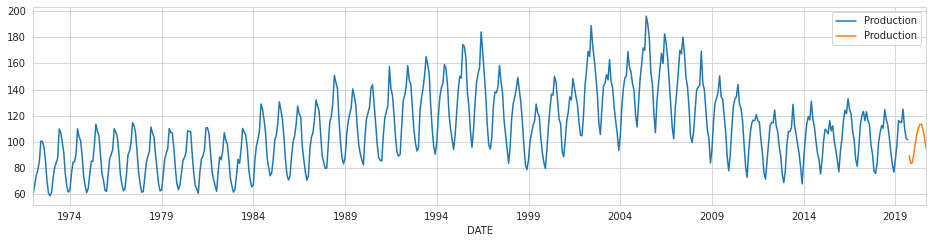

In [115]:
fig, axes = plt.subplots(2,1,figsize=(16,8))
ax = axes.flatten()
df.plot(ax=ax[0])
forecast_df.plot(ax=ax[0])
ax[-1].set_visible(False)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___